In [2]:
import colour
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [ ]:
red_wavelength = 644
green_wavelength = 515  # approx
blue_wavelength = 467.83  # approx

z = 1  # distance to the center
beta = 0.5
gamma = 1 / np.sqrt(1 - beta ** 2)


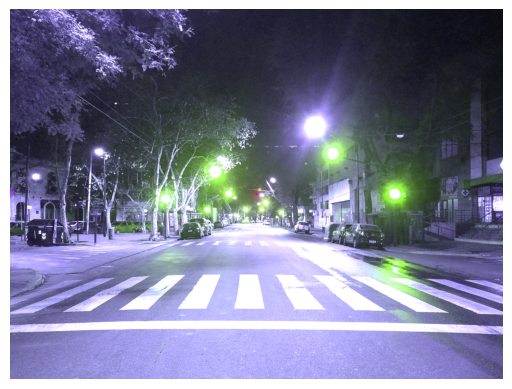

In [8]:

# Helper functions
def cartesian_to_spherical(x, y):
    return np.arctan(np.sqrt(x ** 2 + y ** 2) / z)

def wavelength_to_rgb(wavelength, intensity):
    visible_wavelength = np.clip(wavelength, 360, 780)
    xyz = colour.wavelength_to_XYZ(visible_wavelength)
    rgb = colour.XYZ_to_sRGB(xyz)
    rgb = (rgb.T * intensity).T 
    rgb = np.clip(rgb, 0, 255).astype(int)
    return rgb

def transform_wavelength(wavelength, theta):
    return wavelength / (gamma * (1 - beta * np.cos(theta)))

def transform_rgb(red_intensity, green_intensity, blue_intensity, theta):
    red_wavelength_trans = transform_wavelength(red_wavelength, theta)
    green_wavelength_trans = transform_wavelength(green_wavelength, theta)
    blue_wavelength_trans = transform_wavelength(blue_wavelength, theta)

    red_rgb_trans = wavelength_to_rgb(red_wavelength_trans, red_intensity)
    green_rgb_trans = wavelength_to_rgb(green_wavelength_trans, green_intensity)
    blue_rgb_trans = wavelength_to_rgb(blue_wavelength_trans, blue_intensity)

    rgb_trans = np.clip(red_rgb_trans + green_rgb_trans + blue_rgb_trans, 0, 255)
    return rgb_trans

In [ ]:

# Load image
image_path = 'semaforo2.jpg'
image = Image.open(image_path)
image = image.convert('RGB')
pixels = np.array(image)

height, width, _ = pixels.shape

# Precompute theta values
x_coords = np.arange(-width//2, width//2)
y_coords = np.arange(-height//2, height//2)
x_grid, y_grid = np.meshgrid(x_coords, y_coords)
theta_grid = cartesian_to_spherical(x_grid, y_grid)

# Extract individual color channels
red_channel = pixels[:, :, 0] 
green_channel = pixels[:, :, 1]
blue_channel = pixels[:, :, 2]

# Vectorized transformation
transformed_pixels = np.zeros((height, width, 3), dtype=np.uint8)
for i in range(height):
    transformed_rgb = transform_rgb(red_channel[i, :], green_channel[i, :], blue_channel[i, :], theta_grid[i, :])
    transformed_pixels[i, :, :] = transformed_rgb

# Display transformed image
transformed_image = Image.fromarray(transformed_pixels)
plt.imshow(transformed_image)
plt.axis('off')
plt.show()


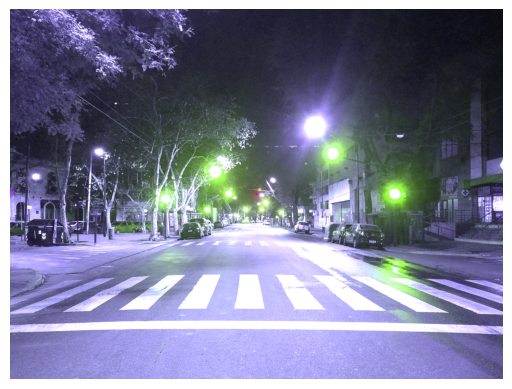

In [9]:
transformed_image = Image.fromarray(transformed_pixels)
plt.imshow(transformed_image)
plt.axis('off')
plt.savefig('semaforoverde.jpg')

In [11]:
transformed_image
